## Import Dependency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from encoder_mapper import EncoderMapper
from sklearn.ensemble import RandomForestClassifier

## Load Dataset

In [2]:
file =  '../Dataset/student_depression_dataset.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
# Sample Data
print(df.head())

# Rows and Columns Count
print ("Rows and Column")
print(df.shape)

# Get basic statistics for numerical columns
print(df.describe())

# Check column data types
print(df.dtypes)

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

## Data Pre Processing

## Handling Redundant Data Columns

In [5]:
# Drop the redundant columns that are not necessary for the analysis or target variable
df = df.drop(columns=['Work Pressure', 'Job Satisfaction', 'id', 'Profession'])

# Verify by printing the first few rows and the updated column names
print(df.head())
print(df.columns)

   Gender   Age           City  Academic Pressure  CGPA  Study Satisfaction  \
0    Male  33.0  Visakhapatnam                5.0  8.97                 2.0   
1  Female  24.0      Bangalore                2.0  5.90                 5.0   
2    Male  31.0       Srinagar                3.0  7.03                 5.0   
3  Female  28.0       Varanasi                3.0  5.59                 2.0   
4  Female  25.0         Jaipur                4.0  8.13                 3.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3          '7-8 hours'       Moderate      BCA   
4          '5-6 hours'       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours Financial Stress  \
0                                   Yes               3.0              1.0   
1                                    No               3.0           

## Handling Noisy Data

In [6]:
# Clean up any potential quote marks in 'City'
df['City'] = df['City'].str.replace("'", "")  # Remove any quotes
df['City'] = df['City'].str.strip()  # Remove any extra spaces

# Replace noisy or invalid city names with predefined replacements
city_replacements = {
    'Saanvi': 'Other',
    'Bhavna': 'Other',
    'Harsha': 'Other',
    'Kibara': 'Other',
    'Nandini': 'Other',
    'Nalini': 'Other',
    'Mihir': 'Other',
    'Nalyan': 'Kalyan',
    'M.Com': 'Other',
    'ME': 'Other',
    'Rashi': 'Other',
    'Gaurav': 'Other',
    'Reyansh': 'Other',
    'Harsh': 'Other',
    'Vaanya': 'Other',
    'Mira': 'Other',
    '3.0': 'Other',
    'M.Tech': 'Other',
    'Khaziabad': 'Ghaziabad',
    'Less Delhi': 'Delhi',
    'Less than 5 Kalyan': 'Kalyan',
    'City': 'Other'
}

# Replace noisy data in 'City' with the dictionary
df['City'] = df['City'].replace(city_replacements)

# Replace invalid values in 'Financial Stress' (e.g., '?') with NaN
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

# Impute missing 'Financial Stress' values with the mode (or median)
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mode()[0])

# Verify the cleaned data
print("City value counts after cleaning:")
print(df['City'].value_counts())

print("Financial Stress value counts after cleaning:")
print(df['Financial Stress'].value_counts())


City value counts after cleaning:
City
Kalyan           1572
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             769
Bangalore         767
Ghaziabad         746
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Other              22
Name: count, dtype: int64
Financial Stress value counts after cleaning:
Financial Stress
5.0    6718
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64


## Feature Engineering 

In [7]:
# Rename the columns for simplification
df = df.rename(columns={
    'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts',
    'Family History of Mental Illness': 'Family Mental Health'
})

# Verify the column names after renaming
print(df.columns)

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Suicidal Thoughts', 'Work/Study Hours', 'Financial Stress',
       'Family Mental Health', 'Depression'],
      dtype='object')


## Encoding Categorical Data

In [8]:
# Initialize the EncoderMapper
encoder_mapper = EncoderMapper()

# Encode the columns using the EncoderMapper and store mappings
df = encoder_mapper.encode_column(df, 'Degree')
df = encoder_mapper.encode_column(df, 'City')
df = encoder_mapper.encode_column(df, 'Sleep Duration')
df = encoder_mapper.encode_column(df, 'Dietary Habits')


# Use get_dummies for binary columns that require transformation to 0/1 values
df = pd.get_dummies(df, columns=['Suicidal Thoughts'], drop_first=True) # Yes=1, No=0
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # Female=1, Male=0
df = pd.get_dummies(df, columns=['Family Mental Health'], drop_first=True)  # Yes=1, No=0

# Save the mappings to a file for later use
encoder_mapper.save_mappings('classification_model_mappings.json')

# Check the result
print(df.head())

    Age  Academic Pressure  CGPA  Study Satisfaction  Work/Study Hours  \
0  33.0                5.0  8.97                 2.0               3.0   
1  24.0                2.0  5.90                 5.0               3.0   
2  31.0                3.0  7.03                 5.0               9.0   
3  28.0                3.0  5.59                 2.0               4.0   
4  25.0                4.0  8.13                 3.0               1.0   

   Financial Stress  Depression  Degree Encoded  City Encoded  \
0               1.0           1               4            30   
1               2.0           0              11             2   
2               1.0           0               6            24   
3               5.0           1               8            28   
4               1.0           0              17            10   

   Sleep Duration Encoded  Dietary Habits Encoded  Suicidal Thoughts_Yes  \
0                       0                       0                   True   
1           

## Feature Selection

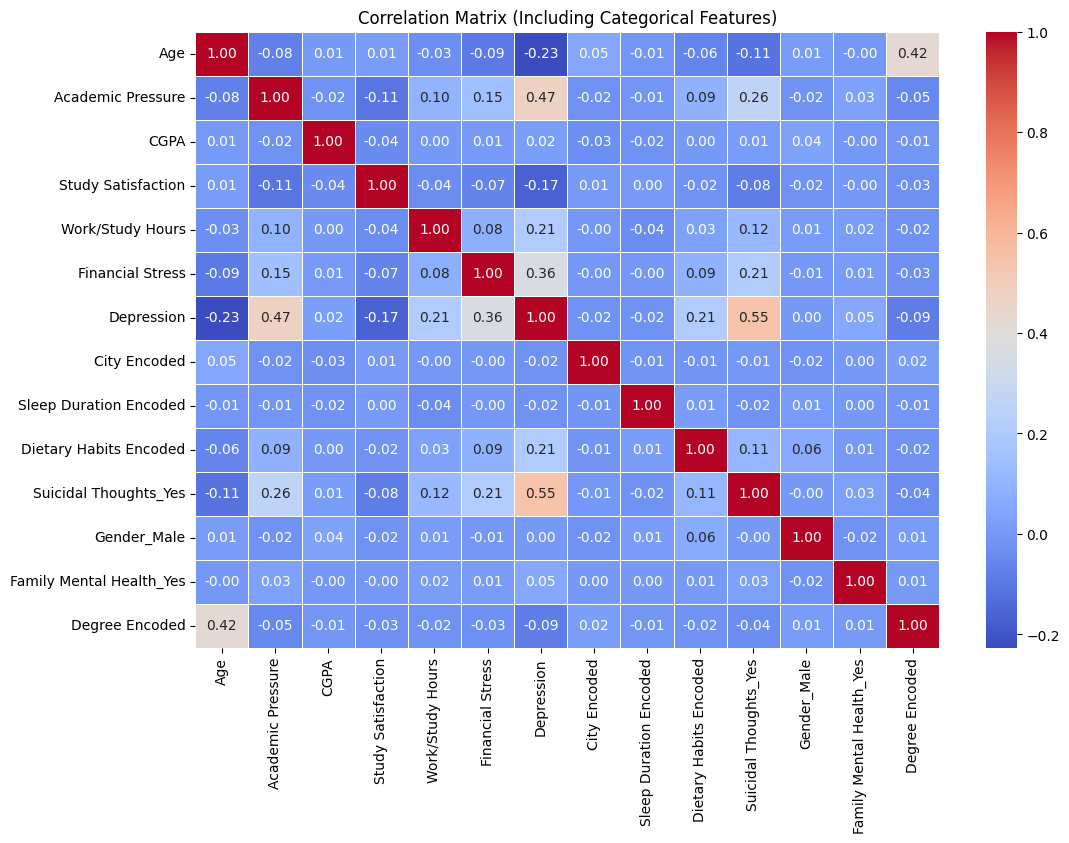

In [9]:
# Select the numeric and categorical columns
numeric_columns = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 
                   'Work/Study Hours', 'Financial Stress', 'Depression']

categorical_columns = ['City Encoded', 'Sleep Duration Encoded', 'Dietary Habits Encoded', 
                       'Suicidal Thoughts_Yes', 'Gender_Male', 'Family Mental Health_Yes', 
                       'Degree Encoded']

# Combine both numeric and categorical columns for correlation
all_columns = numeric_columns + categorical_columns

# Calculate the correlation matrix for both numerical and encoded categorical features
correlation_matrix = df[all_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Including Categorical Features)")
plt.show()


In [10]:
# Select your features and target
X = df[[col for col in numeric_columns if col != 'Depression'] + categorical_columns]  # Use the selected features
y = df['Depression']

# Check the shape of X to verify the columns
print(X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)


(27901, 13)
                     Feature  Importance
9      Suicidal Thoughts_Yes    0.223686
1          Academic Pressure    0.162528
5           Financial Stress    0.097022
2                       CGPA    0.086506
0                        Age    0.081646
6               City Encoded    0.071230
4           Work/Study Hours    0.070608
12            Degree Encoded    0.062585
3         Study Satisfaction    0.043863
8     Dietary Habits Encoded    0.034730
7     Sleep Duration Encoded    0.034119
10               Gender_Male    0.015865
11  Family Mental Health_Yes    0.015611


In [11]:
# Define the features you want to keep
selected_features = [
    'Suicidal Thoughts_Yes', 
    'Dietary Habits Encoded', 
    'Financial Stress', 
    'Work/Study Hours', 
    'Study Satisfaction', 
    'Academic Pressure', 
    'Age',
    'Depression'
]

# Filter the DataFrame to select only these features and the target (Depression)
df = df[selected_features]
df.head()

,Suicidal Thoughts_Yes,Dietary Habits Encoded,Financial Stress,Work/Study Hours,Study Satisfaction,Academic Pressure,Age,Depression
0,True,0,1.0,3.0,2.0,5.0,33.0,1
1,False,1,2.0,3.0,5.0,2.0,24.0,0
2,False,0,1.0,9.0,5.0,3.0,31.0,0
3,True,1,5.0,4.0,2.0,3.0,28.0,1
4,True,1,1.0,1.0,3.0,4.0,25.0,0


## Export Processed Dataset

In [12]:
# Export processed DataFrame to CSV
df.to_csv('../Dataset/processed_student_depression_dataset.csv', index=False)

print("Data exported successfully!")

Data exported successfully!
